# 导入python库

In [142]:
import numpy as np
import matplotlib.pyplot as plt #绘图
import h5py #网页交互
import scipy
from PIL import Image
from scipy import ndimage #测试模型
from lr_utils import load_dataset #读取数据专用

# loading the data(cat/non-cat)

In [86]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

# 测试图像读取

y = [0], it is a 'non-cat ' picture.


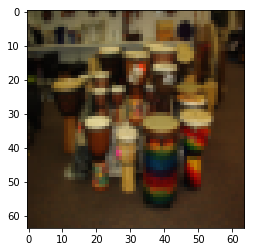

In [87]:
index=5
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y[:,index])+", it is a '"+classes[np.squeeze(train_set_y[:,index])].decode("utf-8")+" ' picture.")
#train_set_y输出是否为猫  classes分类状态，从序列中寻找 

# 图像规模确认

In [88]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


In [89]:
print(m_test)

50


In [90]:
print(num_px)

64


# flatten一维化

In [91]:
#一维化
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
#原数组（209，64，64，3）
#reshape计算维度值 -1代表将原shape转化为train_set_x_orig.shape[0] 
#
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

结果为64*64*3，209，也就是将-1那一行为其他元素合并

In [92]:
print ("train_set_y shape: " + str(train_set_y.shape))

train_set_y shape: (1, 209)


In [93]:
print (str(test_set_x_flatten.shape))

(12288, 50)


In [94]:
print ("test_set_y shape: " + str(test_set_y.shape))


test_set_y shape: (1, 50)


# 最终图像规模确认

In [95]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [96]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


#  集中化和标准化处理，将数据集的每一行除以像素通道的最大值  ？？？

In [97]:
train_set_x=train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

 What you need to remember:

Common steps for pre-processing a new dataset are:
1、确认数据规模
2、reshape数据向量
3、标准化

# General Architecture of the learning algorithm(算法)
建立算法中基本的函数

In [98]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [99]:
print(str(sigmoid(np.array([0,2]))))

[0.5        0.88079708]


# 初始化参数

In [100]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    #assert断言，判定用途
    #isinstance判断变量类型
    return w,b

In [101]:
dim = 2
w,b = initialize_with_zeros(dim)
print(w)
print(b)

[[0.]
 [0.]]
0


# Forward and Backward propagation

In [102]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    cost=-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw=1/m*np.dot(X,(A-Y).T)
    db=1/m*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost) #将cost维数为1的条目删除

    assert(cost.shape==())
    
    grads={"dw":dw,"db":db}

    return grads,cost

In [103]:
w,b,X,Y = np.array([[1],[2]]),2,np.array([[1,2],[3,4]]),np.array([[1,0]])
grads,cost=propagate(w,b,X,Y)
print(grads["dw"])
print(grads["db"])
print(str(cost))

[[0.99993216]
 [1.99980262]]
0.49993523062470574
6.000064773192205


In [104]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost = False):
    #num_iterations循环迭代次数
    #learning_rate学习率
    #print_cost如果=true，每过一百次输出loss
    costs = []
    
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        
        dw =grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b- learning_rate*db
        
        if i%100 ==0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("cost after iteration %i :%f" %(i,cost))
    params={"w":w,"b":b}
    grads={"dw":dw,"db":db}
            
    return params,grads,costs

In [105]:
params,grads,costs = optimize(w,b,X,Y,num_iterations=100,learning_rate=0.009,print_cost=False)

print(str(params["w"]))
print(str(params["b"]))
print(str(grads["dw"]))
print(str(grads["db"]))
print(costs)

[[0.1124579 ]
 [0.23106775]]
1.5593049248448891
[[0.90158428]
 [1.76250842]]
0.4304620716786828
[6.000064773192205]


In [106]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m)) 
    w = w.reshape(X.shape[0],1)
    
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [107]:
print("predictions = "+str(predict(w,b,X)))

predictions = [[1. 1.]]


# 模型输出

In [144]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate = 0.5 ,print_cost = False):
    w , b = initialize_with_zeros(X_train.shape[0]) #根据nx初始化w
    
    parameters,grads,costs= optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    w=parameters["w"]
    b=parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("train accuracy:{} %".format(100 - np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d={
        "costs":costs,
        "Y_prediction_test":Y_prediction_test,
        "Y_prediction_train":Y_prediction_train,
        "w":w,
        "b":b,
        "learning_rate":learning_rate,
        "num_iterations":num_iterations
    }
    return d

In [113]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after iteration 0 :0.693147
cost after iteration 100 :0.584508
cost after iteration 200 :0.466949
cost after iteration 300 :0.376007
cost after iteration 400 :0.331463
cost after iteration 500 :0.303273
cost after iteration 600 :0.279880
cost after iteration 700 :0.260042
cost after iteration 800 :0.242941
cost after iteration 900 :0.228004
cost after iteration 1000 :0.214820
cost after iteration 1100 :0.203078
cost after iteration 1200 :0.192544
cost after iteration 1300 :0.183033
cost after iteration 1400 :0.174399
cost after iteration 1500 :0.166521
cost after iteration 1600 :0.159305
cost after iteration 1700 :0.152667
cost after iteration 1800 :0.146542
cost after iteration 1900 :0.140872
train accuracy:99.04306220095694 %
test accuracy: 70.0 %


# 测试图像分类

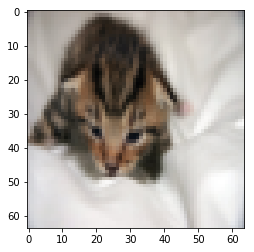

In [151]:
index = 1
plt.imshow(test_set_x[:,index].reshape(num_px,num_px,3))

In [120]:
print(test_set_x[:,1].reshape(num_px,num_px,3).shape)

(64, 64, 3)


In [132]:
print(classes[int(d["Y_prediction_test"][0,index])].decode("utf-8"))

cat


In [139]:
print(classes[1].decode("utf-8"))

cat


# 关于学习率的分析

learning_rates =0.01
cost after iteration 0 :0.693147
cost after iteration 100 :0.823921
cost after iteration 200 :0.418944
cost after iteration 300 :0.617350
cost after iteration 400 :0.522116
cost after iteration 500 :0.387709
cost after iteration 600 :0.236254
cost after iteration 700 :0.154222
cost after iteration 800 :0.135328
cost after iteration 900 :0.124971
cost after iteration 1000 :0.116478
cost after iteration 1100 :0.109193
cost after iteration 1200 :0.102804
cost after iteration 1300 :0.097130
cost after iteration 1400 :0.092043
train accuracy:99.52153110047847 %
test accuracy: 68.0 %

---------

learning_rates =0.001
cost after iteration 0 :0.693147
cost after iteration 100 :0.591289
cost after iteration 200 :0.555796
cost after iteration 300 :0.528977
cost after iteration 400 :0.506881
cost after iteration 500 :0.487880
cost after iteration 600 :0.471108
cost after iteration 700 :0.456046
cost after iteration 800 :0.442350
cost after iteration 900 :0.429782
cost after i

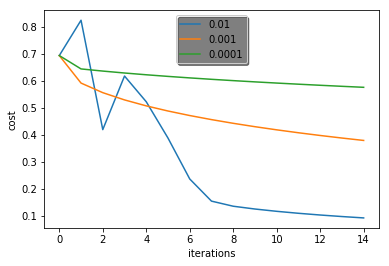

In [150]:
learning_rates = [0.01,0.001,0.0001]
models= {}
for i in learning_rates:
    print("learning_rates =" +str(i) )
    models[str(i)]=model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations = 1500 ,learning_rate= i, print_cost = True)
    print('\n'+"---------"+'\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]),label = str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc= 'upper center',shadow =True) #将图例居中并阴影
frame = legend.get_frame()

frame.set_facecolor('none') #背景透明度
plt.show()


# Test with your own image (optional/ungraded exercise)

In [162]:
my_image = "images/my_image.jpg"
image= np.array(ndimage.imread(my_image))

D:\windows\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


In [163]:
my_image = scipy.misc.imresize(image,size=(num_px,num_px)).reshape((1,num_px*num_px*3)).T

D:\windows\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


y = 0.0, your algorithm predicts a "non-cat" picture.


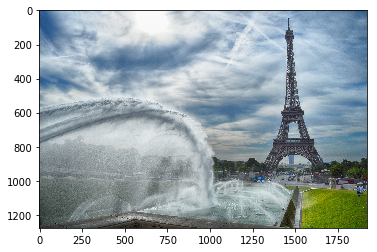

In [164]:
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")